# **Python + DS**

Se analizará el dataset [`Data Developer Salary in 2024💰`](https://www.kaggle.com/datasets/zeesolver/data-eng-salary-2024) de Kaggle. Para esto primero se realizará el **preprocesamiento de la data** y posteriormente la **visualización de la data** limpia.

## **Data preprocessing**

### **1. Importing packages**
Se importarán las librerias a usar a lo largo de todo el documento.

In [149]:
import pandas as pd
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt

### **2. Downloading data**
A través de la libreria `kagglehub` se descargará el dataset mencionado

In [46]:
path = kagglehub.dataset_download("zeesolver/data-eng-salary-2024")

100%|██████████| 108k/108k [00:00<00:00, 259kB/s]

Extracting files...


In [47]:
path = os.path.join(path, "Dataset salary 2024.csv")
print("Dataset guardado en:", path)

Dataset guardado en: /Users/nayeli/.cache/kagglehub/datasets/zeesolver/data-eng-salary-2024/versions/1/Dataset salary 2024.csv


### **3. Analysing data**

Primero con ayuda de `pandas` leeremos el csv que acabamos de descargar

In [113]:
df = pd.read_csv(path)

In [88]:
df.shape

(16534, 11)

El dataset cuenta con $16534$ tuplas y $11$ atributos.

In [89]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Donde el significado de cada columna es el siguiente:
- **experience_level:** Level of professional experience (e.g., junior, mid, senior).
- **employment_type:** Type of job contract (e.g., full-time, part-time, contract).
- **job_title:** The specific role or title of the employee (e.g., Data Engineer).
- **salary:** The compensation received, in the original currency.
- **salary_currency:** The currency in which the salary is paid.
- **salary_in_usd:** The salary converted into US dollars for comparison.
- **employee_residence:** The location where the employee resides.
- **remote_ratio:** Percentage of work done remotely.
- **company_location:** The geographical location of the company.
- **company_size:** The scale of the company, often based on employee count.

In [90]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


Verificaremos la cantidad de nulos en cada columna con el siguiente comando:

In [92]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Al parecer, el dataset no tiene ningun atributo nulo, por lo que no será necesario aplicar ninguna técnica para manejar valores nulos

In [93]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


- **Columna `work_year`:**  
  Solo interesan los valores mínimo y máximo para conocer el rango temporal del dataset. Ambos están dentro de lo esperado, por lo que no hay problemas con esta variable.

- **Columna `remote_ratio`:**  
  Recordemos que esta representa el porcentaje de trabajo remoto, y su valor máximo es 100, lo cual está dentro del rango permitido (0 a 100).

- **Columna `salary`:**  
  Esta columna no es tan útil para el análisis, ya que los salarios están en distintas monedas, lo que impide una comparación directa (luego se eliminará).

- **Columna `salary_in_usd`:**  
  Esta sí resulta útil, pues los valores están estandarizados en dólares estadounidenses. Además, los valores observados están dentro de un rango razonable, por lo que no se identifican anomalías.


In [94]:
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
62,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
151,2024,SE,FT,Research Analyst,130000,USD,130000,US,0,US,M
238,2024,MI,FT,Data Analyst,95000,USD,95000,US,0,US,M
239,2024,MI,FT,Data Analyst,80000,USD,80000,US,0,US,M
247,2024,SE,FT,Data Scientist,146000,USD,146000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16235,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
16236,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
16237,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
16376,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


Hay $6421$ tuplas que se repiten, verificaremos si en efecto se están repitiendo

In [100]:
duplicated_rows = df[df.duplicated()]  # todas las duplicadas
random_duplicated_row = duplicated_rows.iloc[9]  # random fila duplicada
repeated_tuple_rows = df[df.eq(random_duplicated_row).all(axis=1)] # Filtra todas las filas iguales a esa tupla


In [101]:
repeated_tuple_rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
227,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M
303,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M
1791,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M
1939,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M
2785,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M
3712,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M
3783,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M
5209,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M
5637,2024,MI,FT,Data Scientist,90000,USD,90000,US,100,US,M



En efecto, se identificaron filas duplicadas dentro del dataset. La decisión de eliminarlas depende directamente del objetivo del análisis y del tipo de consultas que se desean realizar. En este caso, se optó por eliminar las filas duplicada, puesto que en este caso específico, las filas duplicadas no aportan información adicional ni valor analítico, ya que representan exactamente los mismos datos ya existentes. Mantener estos registros podría introducir sesgos o distorsiones en los resultados estadísticos o en los modelos que se generen. Por ello, se opta por su eliminación para asegurar la calidad, precisión y eficiencia del análisis posterior.


In [114]:
df_copy = df.copy()
df_copy.drop_duplicates(inplace=True) # se eliminan en el mismo DataFrame

In [115]:
df_copy.shape

(10113, 11)

Ahora veremos que datos hay en cada columna, y si hay algún dato anormal se lo borrará del DataFrame    

In [59]:
df.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [60]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [61]:
df.job_title.unique()

array(['AI Engineer', 'Data Engineer', 'Machine Learning Engineer',
       'ML Engineer', 'Data Analyst', 'NLP Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Manager', 'Data Architect',
       'Data Operations Manager', 'Research Scientist',
       'Data Science Manager', 'Business Intelligence Engineer',
       'Business Intelligence', 'Data Modeler',
       'Data Integration Specialist', 'Data Product Manager',
       'Data Visualization Specialist', 'Data Science', 'Data Specialist',
       'Business Intelligence Lead', 'Research Analyst',
       'Business Intelligence Analyst', 'AI Software Engineer',
       'Machine Learning Scientist', 'Data Science Engineer',
       'Machine Learning Operations Engineer', 'Analytics Engineer',
       'Data Management Analyst',
       'Encounter Data Management Professional',
       'Data Analytics Specialist', 'Head of Data', 'Data Analytics Lead',
       'Research Engineer', 'AI Scientist',
       'Business Intelligence Develope

In [63]:
df.salary_currency.unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'DKK', 'INR', 'ILS', 'BRL', 'CHF',
       'NZD', 'AUD', 'PLN', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR', 'HKD',
       'SGD', 'THB', 'HUF', 'MXN', 'CLP'], dtype=object)

In [64]:
df.employee_residence.unique()

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'GE', 'IN', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU',
       'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK',
       'CF', 'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

In [65]:
df.company_location.unique()

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'IN', 'DE', 'IL', 'FI', 'AT', 'BR', 'CH', 'AE',
       'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX', 'PT', 'BA', 'IT',
       'AS', 'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI',
       'CO', 'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH', 'SE', 'AD',
       'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

In [66]:
df.company_size.unique()

array(['M', 'L', 'S'], dtype=object)

In [44]:
df.country.unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

Al parecer, todos los valores categóricos son considerados normales, por lo que no se eliminará ninguno de ellos.

Como se mencionó anteriormente, se eliminarán las columnas `salary` y `salary_currency`, ya que `salary_in_usd` representa el salario convertido a una moneda común (USD), permitiendo una comparación justa y uniforme entre todos los registros.

Mantener las otras dos columnas sería redundante, ya que `salary_in_usd` ya contiene la información relevante en una escala comparable. Además, eliminar estas columnas reduce la complejidad del dataset y facilita el análisis posterior.


In [116]:
df_copy = df_copy.drop(labels=["salary", "salary_currency"], axis=1)

In [117]:
df_copy.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [118]:
df_copy.describe()

,work_year,salary_in_usd,remote_ratio
count,10113.000000,10113.000000,10113.000000
mean,2023.227529,146662.179571,35.553248
std,0.783372,72697.319441,47.227660
min,2020.000000,15000.000000,0.000000
25%,2023.000000,95000.000000,0.000000
50%,2023.000000,138750.000000,0.000000
75%,2024.000000,185900.000000,100.000000
max,2024.000000,800000.000000,100.000000


Se decidió aplicar normalización únicamente a las siguientes columnas:

1. **`remote_radio`**
2. **`max_handover_attempts`**

Ambas columnas contienen valores numéricos que pueden variar en un rango amplio. Al no estar en una misma escala, podrían influir de manera desproporcionada en ciertos modelos o visualizaciones.

**Normalización de `remote_radio`**

In [119]:
df_copy["remote_ratio_nrm"] = df_copy["remote_ratio"] / 100

Aunque la columna ya se encuentra en una escala conocida, convertirla a un rango de 0 a 1 permite uniformidad con otras variables y evita que su escala influya más que otras en procesos posteriores.

**Estandarización de `salary_in_usd`**

In [120]:
media = df_copy['salary_in_usd'].mean()
desviacion = df_copy['salary_in_usd'].std()

df_copy['salary_in_usd_std'] = (df_copy['salary_in_usd'] - media) / desviacion

Para evitar que la columna `salary_in_usd` tenga un peso desproporcionado en el análisis se aplicó la **estandarización** porque sus valores no se encontraban en una escala fija y podían tener una distribución diferente a la de otras variables. Al estandarizar, transformamos los datos para que tengan una media de 0 y una desviación estándar de 1, lo que permite compararlos de manera más justa con otras variables en algoritmos sensibles a la escala, como modelos de machine learning o análisis estadísticos. Esta técnica es especialmente útil cuando los datos no están en una escala conocida o no están acotados. No se aplicó normalización ayq ue esta es sensible a outliers



In [121]:
df_copy.describe()

,work_year,salary_in_usd,remote_ratio,remote_ratio_nrm,salary_in_usd_std
count,10113.000000,10113.000000,10113.000000,10113.000000,1.011300e+04
mean,2023.227529,146662.179571,35.553248,0.355532,-1.124165e-17
std,0.783372,72697.319441,47.227660,0.472277,1.000000e+00
min,2020.000000,15000.000000,0.000000,0.000000,-1.811101e+00
25%,2023.000000,95000.000000,0.000000,0.000000,-7.106477e-01
50%,2023.000000,138750.000000,0.000000,0.000000,-1.088373e-01
75%,2024.000000,185900.000000,100.000000,1.000000,5.397423e-01
max,2024.000000,800000.000000,100.000000,1.000000,8.987096e+00


In [125]:
df_clean = df_copy.copy()

In [127]:
df_clean.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'remote_ratio_nrm',
       'salary_in_usd_std'],
      dtype='object')

### **4. Visualización de datos**

**1. ¿Qué tipos de empleo (employment_type) están más asociados con salarios altos?**

/var/folders/76/ws8z3mnx1634t9z0jpzfq6k00000gn/T/ipykernel_65843/8805928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_by_employment, x="employment_type", y="salary_in_usd", palette="viridis")


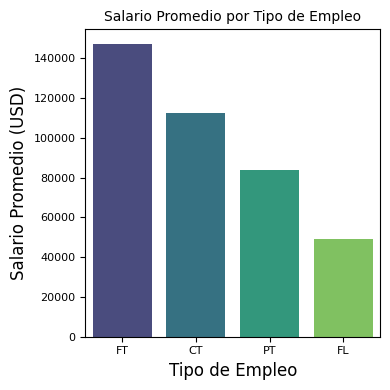

In [ ]:
# Agrupar por tipo de empleo y calcular el salario promedio
salary_by_employment = df_clean.groupby("employment_type")["salary_in_usd"].mean().reset_index()

# Ordenar de mayor a menor
salary_by_employment = salary_by_employment.sort_values(by="salary_in_usd", ascending=False)

# Crear el gráfico
plt.figure(figsize=(4, 4))
sns.barplot(data=salary_by_employment, x="employment_type", y="salary_in_usd", palette="viridis")

# Labels
plt.title("Salario Promedio por Tipo de Empleo", fontsize=10)
plt.xlabel("Tipo de Empleo", fontsize=12)
plt.ylabel("Salario Promedio (USD)", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Este gráfico muestra el salario promedio en dólares estadounidenses (salary_in_usd) para cada categoría de employment_type. Se puede ver como:
- FT (Full-time) con salarios más altos y mayor volumen de empleados.
- PT (Part-time) y FL (Freelance) con salarios más bajos en promedio, ya que generalmente trabajan menos horas.
- CT (Contract) tiene salarios variables, esto puede deberse al país y la industria.

Este análisis permite identificar qué tipo de contratos ofrecen mayores oportunidades económicas para los data developers en 2024.

**2. ¿Cuál es la distribución de salarios según el nivel de experiencia (experience_level)?**

/var/folders/76/ws8z3mnx1634t9z0jpzfq6k00000gn/T/ipykernel_65843/2454644724.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=df_clean, palette='Set2', order=experience_order)


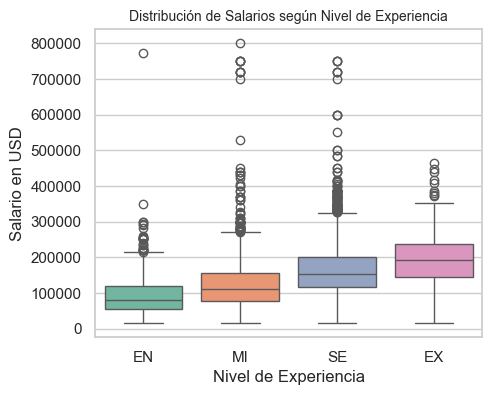

In [ ]:
sns.set(style="whitegrid")

# Define el orden jerárquico de los niveles de experiencia
experience_order = ['EN', 'MI', 'SE', 'EX']  # Entry-level, Mid-level, Senior, Executive

# Crear el boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_clean, palette='Set2', order=experience_order)

# Labels
plt.title('Distribución de Salarios según Nivel de Experiencia', fontsize=10)
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')

plt.show()

El boxplot muestra cómo varía el salario dependiendo del nivel de experiencia, con las siguientes observaciones:
- EX (Executive-level):
    Tiene la mediana salarial más alta. También muestra poca dispersión comparado con el resto, lo que indica que la mayoría gana más o menos lo mismo. Posiblemente no existen outliers muy positivos, esto puede deberse a que no se está tomando en cuenta el tipo de trabajo en cada nivel de experiencia, puede que en este nivel estén los tipos de trabajos con un sueldo regular
- SE (Senior-level):
    Segundo nivel con mayor mediana salarial. Lo esperado. La distribución es más dispersa que la de los ejecutivos,y presenta una gama más alta de salarios.
- MI (Mid-level):
    La mediana es significativamente más baja que la de los niveles senior y executive. Pero es posible que nos hayamos topado con outliers, ya que en este nivel lo esperado es que los salarios sean menores que los de nivel EX
- EN (Entry-level):
    Tiene la mediana más baja de todos los niveles. Menor dispersión salarial. Sin embargo, pasa algo similar a MI, ya que hay un salario mayor a todos los de EX, lo cual es algo bastante inesperado.


A medida que el nivel de experiencia aumenta, también lo hace el salario.
La diferencia de mediana de salario entre niveles es clara, justificando la importancia de la experiencia en el mercado laboral de ciencia de datos.
Las empresas parecen estar dispuestas a pagar mucho más a empleados senior y ejecutivos, aunque esto también viene con mayor variabilidad.

3. ¿Cuál es la distribución de los salarios (en USD) para cada nivel de trabajo remoto (0%, 50%, 100%)?

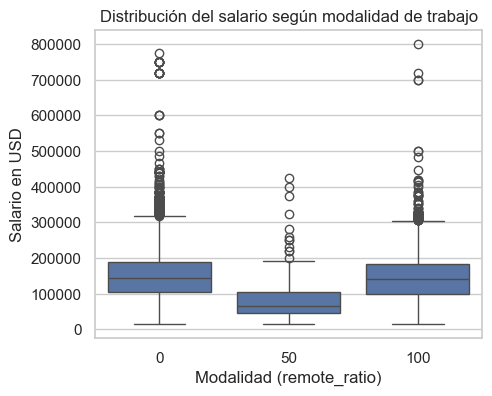

In [140]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd')
plt.title('Distribución del salario según modalidad de trabajo')
plt.xlabel('Modalidad (remote_ratio)')
plt.ylabel('Salario en USD')
plt.show()


- Modalidad 0% (presencial):
    La mediana salarial es moderada. Existe una gran cantidad de outliers con salarios altos. La dispersión salarial es considerable, con un amplio rango intercuartílico.
- Modalidad 50% (híbrido):
    La mediana salarial es la más baja entre las tres modalidades. Menor dispersión comparada con las otras modalidades. Aunque hay algunos outliers altos, son menos frecuentes que en otras modalidades.
- Modalidad 100% (remoto):
    La mediana salarial es ligeramente mayor que la del trabajo presencial. La mayor cantidad de outliers altos, lo cual indica que los salarios más elevados tienden a estar en trabajos remotos. Alta dispersión, similar al trabajo 100% presencial.

El trabajo 100% remoto parece estar más asociado a salarios altos, especialmente observando la cola superior (outliers).
La modalidad híbrida (50%) muestra la mediana salarial más baja, lo cual podría indicar menor remuneración en este esquema.
En general, la modalidad remota total ofrece una mejor oportunidad de obtener salarios más altos, aunque con alta variabilidad. Sin embargo aquí no se está tomando en cuenta el tipo de nivel que tienen los trabajadores

**4. ¿Cuáles son los puestos de trabajo mejor y peor remunerados en el área de desarrollo de datos?**

/var/folders/76/ws8z3mnx1634t9z0jpzfq6k00000gn/T/ipykernel_65843/1857824250.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette="viridis")


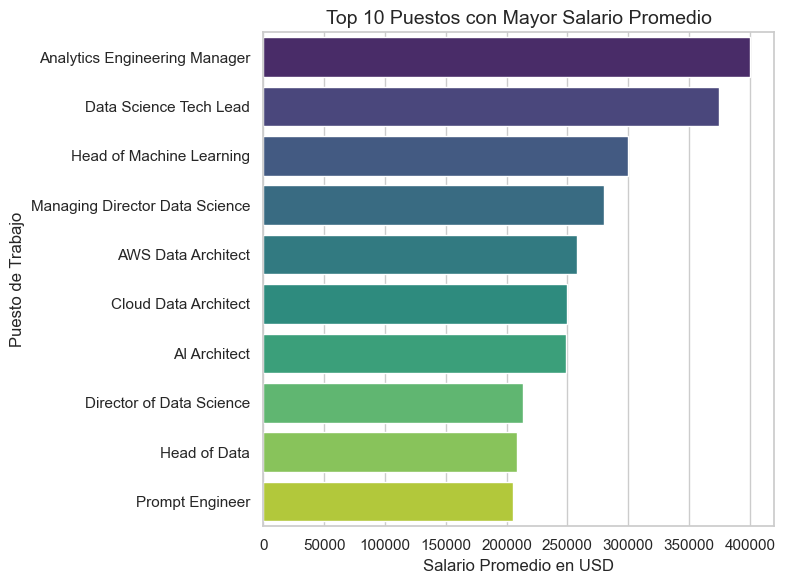

In [ ]:
avg_salary_by_job = df_clean.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Seleccionar los 10 trabajos mejor pagados
top_10_jobs = avg_salary_by_job.head(10)

# Configurar el gráfico
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Crear gráfico de barras horizontal
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette="viridis")

# Labels
plt.title('Top 10 Puestos con Mayor Salario Promedio', fontsize=14)
plt.xlabel('Salario Promedio en USD')
plt.ylabel('Puesto de Trabajo')

plt.tight_layout()
plt.show()


Los tres primeros lugares son ocupados por roles de alta jerarquía:
- Analytics Engineering Manager
- Data Science Tech Lead
- Head of Machine Learning

Esto confirma que los cargos ejecutivos y de dirección en el ámbito de datos tienen una remuneración significativamente más alta.

Estos puestos requieren un alto nivel técnico y especialización, lo cual se traduce en una compensación elevada.
Emergencia de nuevos roles:
Prompt Engineer aparece en el top 10, lo que indica que nuevos perfiles enfocados en IA generativa están siendo altamente valorados en el mercado.

Los puestos que combinan liderazgo técnico, experiencia en arquitectura de sistemas de datos y conocimientos en inteligencia artificial son los que perciben los salarios más altos en el sector de data development.

/var/folders/76/ws8z3mnx1634t9z0jpzfq6k00000gn/T/ipykernel_65843/1517040900.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_jobs.values, y=bottom_10_jobs.index, palette="viridis")


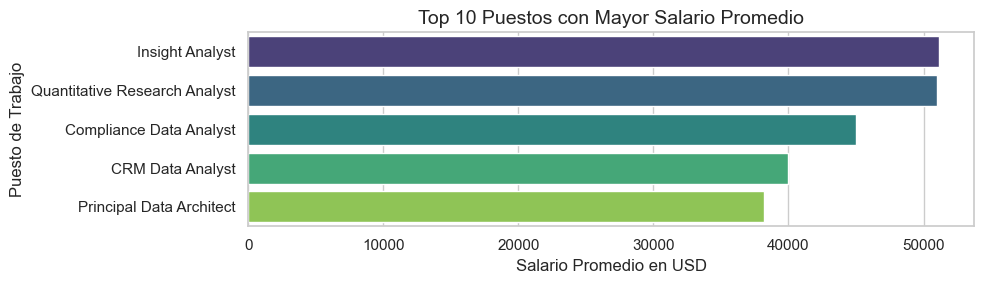

In [ ]:
avg_salary_by_job = df_clean.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Seleccionar los 10 trabajos peor pagados
bottom_10_jobs = avg_salary_by_job.tail(5)

# Configurar el gráfico
plt.figure(figsize=(10, 3))
sns.set(style="whitegrid")

sns.barplot(x=bottom_10_jobs.values, y=bottom_10_jobs.index, palette="viridis")

# Labels
plt.title('Top 10 Puestos con Mayor Salario Promedio', fontsize=14)
plt.xlabel('Salario Promedio en USD')
plt.ylabel('Puesto de Trabajo')

plt.tight_layout()
plt.show()

Todos los trabajos peor pagados están relacionados con análisis de datos, pero en áreas específicas dentro de negocios, cumplimiento, o marketing.
A diferencia de roles técnicos más especializados como Machine Learning Engineer o AI Architect, estos cargos tienden a tener:
- Menor nivel técnico en herramientas avanzadas de programación o modelado
- Menor demanda en el mercado actual, lo que puede presionar los salarios a la baja.

Recordar que aquí no se está analizando el tamaño de la empresa ni el nivel de trabajador, por lo que también es posible que muchos de estos cargos existan en empresas pequeñas o medianas, donde el presupuesto para roles analíticos no es tan alto.

Aunque todos estos roles están en el ámbito de Data, no todos se benefician por igual. Los puestos más orientados a negocio tradicional tienden a tener salarios menos competitivos, destacando la importancia de la especialización técnica y la actualización continua en el campo de datos.

**5. ¿Qué combinación de tamaño de empresa (company_size) y nivel de experiencia (experience_level) está asociada con mayores salarios promedio?**

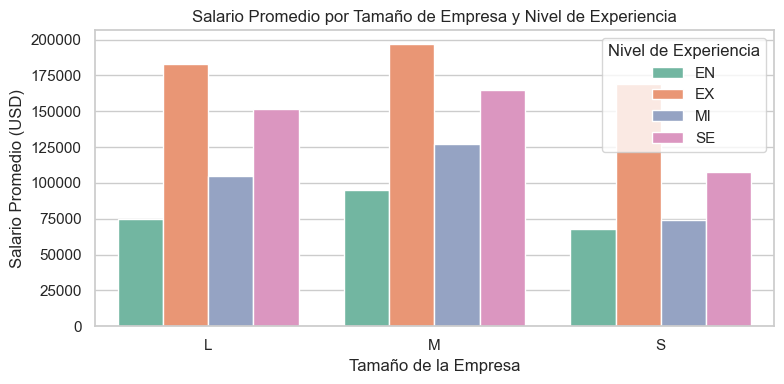

In [ ]:
grouped = df_clean.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Crear gráfico de barras agrupadas
plt.figure(figsize=(8, 4))
sns.barplot(data=grouped, x='company_size', y='salary_in_usd', hue='experience_level', palette='Set2')

# Labels
plt.title('Salario Promedio por Tamaño de Empresa y Nivel de Experiencia')
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Salario Promedio (USD)')
plt.legend(title='Nivel de Experiencia')

# Mostrar gráfico
plt.tight_layout()
plt.show()

Los empleados con mayor experiencia (EX - Executive) reciben los salarios más altos, sin importar el tamaño de la empresa.
Especialmente en empresas medianas (M), donde el salario promedio para este nivel alcanza su punto máximo (~200 000 USD).
Los empleados junior (EN - Entry Level) reciben los salarios más bajos en todos los tamaños de empresa, lo cual es esperado.
En empresas grandes (L), el salario promedio para nivel EN ronda los 75 000 USD.
Las empresas medianas (M) tienden a pagar mejor en todos los niveles de experiencia comparado con empresas grandes (L) y pequeñas (S).
Esto puede ser un hallazgo un poco sorprendente, ya que a menudo se espera que las grandes empresas paguen más.
Los perfiles senior (SE) y mid-level (MI) tienen una progresión salarial clara, y los sueldos también tienden a ser más altos en empresas medianas.

Las empresas medianas podrían estar compitiendo con grandes empresas por talento, ofreciendo salarios más competitivos.
Las empresas pequeñas probablemente tengan restricciones presupuestarias, lo que se refleja generalmente en salarios más bajos.
A medida que aumenta el nivel de experiencia, el impacto del tamaño de empresa es más notorio en el salario final.